In [2]:
import pandas as pd

a=pd.read_csv('./CoolingLoad15months.csv',parse_dates=['Timestamp'])

In [3]:
a

,Timestamp,Average_OAT,Humidity,UV_Index,Average_Rainfall,NT_CoolingLoad,ST_CoolingLoad,CoolingLoad
0,2020-04-01 00:00:00,19.253033,NaN,0.0,0.0,NaN,NaN,NaN
1,2020-04-01 00:15:00,19.355533,NaN,0.0,0.0,NaN,NaN,NaN
2,2020-04-01 00:30:00,19.404700,NaN,0.0,0.0,NaN,NaN,NaN
3,2020-04-01 00:45:00,19.519700,NaN,0.0,0.0,NaN,NaN,NaN
4,2020-04-01 01:00:00,19.505533,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
43771,2021-06-30 22:45:00,29.533667,82.431233,0.4,0.0,196.688778,651.424533,848.113311
43772,2021-06-30 23:00:00,29.447833,83.034533,0.4,0.0,97.721117,988.632275,1086.353392
43773,2021-06-30 23:15:00,29.506167,83.907867,0.4,0.0,220.470320,1174.383238,1394.853558
43774,2021-06-30 23:30:00,29.464500,81.564533,0.4,0.0,85.974601,141.593351,227.567952


In [4]:
a.Timestamp

0       2020-04-01 00:00:00
1       2020-04-01 00:15:00
2       2020-04-01 00:30:00
3       2020-04-01 00:45:00
4       2020-04-01 01:00:00
                ...        
43771   2021-06-30 22:45:00
43772   2021-06-30 23:00:00
43773   2021-06-30 23:15:00
43774   2021-06-30 23:30:00
43775   2021-06-30 23:45:00
Name: Timestamp, Length: 43776, dtype: datetime64[ns]

In [5]:
a['dayofweek']=a['Timestamp'].dt.dayofweek
a['dayofyear']=a['Timestamp'].dt.dayofyear

In [6]:
a

,Timestamp,Average_OAT,Humidity,UV_Index,Average_Rainfall,NT_CoolingLoad,ST_CoolingLoad,CoolingLoad,dayofweek,dayofyear
0,2020-04-01 00:00:00,19.253033,NaN,0.0,0.0,NaN,NaN,NaN,2,92
1,2020-04-01 00:15:00,19.355533,NaN,0.0,0.0,NaN,NaN,NaN,2,92
2,2020-04-01 00:30:00,19.404700,NaN,0.0,0.0,NaN,NaN,NaN,2,92
3,2020-04-01 00:45:00,19.519700,NaN,0.0,0.0,NaN,NaN,NaN,2,92
4,2020-04-01 01:00:00,19.505533,NaN,0.0,0.0,NaN,NaN,NaN,2,92
...,...,...,...,...,...,...,...,...,...,...
43771,2021-06-30 22:45:00,29.533667,82.431233,0.4,0.0,196.688778,651.424533,848.113311,2,181
43772,2021-06-30 23:00:00,29.447833,83.034533,0.4,0.0,97.721117,988.632275,1086.353392,2,181
43773,2021-06-30 23:15:00,29.506167,83.907867,0.4,0.0,220.470320,1174.383238,1394.853558,2,181
43774,2021-06-30 23:30:00,29.464500,81.564533,0.4,0.0,85.974601,141.593351,227.567952,2,181


In [7]:
invalid_record=a.NT_CoolingLoad.isna().sum()
invalid_record

5101

In [8]:
(a.NT_CoolingLoad.isna()|a.ST_CoolingLoad.isna()|a.Average_OAT.isna()|a.Humidity.isna()|a.UV_Index.isna()|a.Average_Rainfall.isna()).sum() # records exist missing value

10139

In [9]:
a.Timestamp.dt.day_of_year

0         92
1         92
2         92
3         92
4         92
        ... 
43771    181
43772    181
43773    181
43774    181
43775    181
Name: Timestamp, Length: 43776, dtype: int64

In [10]:

a=a.set_index([a['Timestamp'].rename('date').dt.date,a['Timestamp'].rename('hourofday').dt.hour,a['Timestamp'].rename('minofhour').dt.minute])
#a=a.set_index(a['Timestamp'].rename('hourofday').dt.hour)
a

Timestamp  Average_OAT   Humidity  \
date       hourofday minofhour                                               
2020-04-01 0         0         2020-04-01 00:00:00    19.253033        NaN   
                     15        2020-04-01 00:15:00    19.355533        NaN   
                     30        2020-04-01 00:30:00    19.404700        NaN   
                     45        2020-04-01 00:45:00    19.519700        NaN   
           1         0         2020-04-01 01:00:00    19.505533        NaN   
...                                            ...          ...        ...   
2021-06-30 22        45        2021-06-30 22:45:00    29.533667  82.431233   
           23        0         2021-06-30 23:00:00    29.447833  83.034533   
                     15        2021-06-30 23:15:00    29.506167  83.907867   
                     30        2021-06-30 23:30:00    29.464500  81.564533   
                     45        2021-06-30 23:45:00    24.180417  68.264333   

                                UV_Index  Average_Rainfall  NT_CoolingLoad  \
date       hourofday minofhour                                               
2020-04-01 0         0               0.0               0.0             NaN   
                     15              0.0               0.0             NaN   
                     30              0.0               0.0             NaN   
                     45              0.0               0.0             NaN   
           1         0               0.0               0.0             NaN   
...                                  ...               ...             ...   
2021-06-30 22        45              0.4               0.0      196.688778   
           23        0               0.4               0.0       97.721117   
                     15              0.4               0.0      220.470320   
                     30              0.4               0.0       85.974601   
                     45              0.4               0.0       24.299607   

                                ST_CoolingLoad  CoolingLoad  dayofweek  \
date       hourofday minofhour                                           
2020-04-01 0         0                     NaN          NaN          2   
                     15                    NaN          NaN          2   
                     30                    NaN          NaN          2   
                     45                    NaN          NaN          2   
           1         0                     NaN          NaN          2   
...                                        ...          ...        ...   
2021-06-30 22        45             651.424533   848.113311          2   
           23        0              988.632275  1086.353392          2   
                     15            1174.383238  1394.853558          2   
                     30             141.593351   227.567952          2   
                     45             562.779136   587.078743          2   

                                dayofyear  
date       hourofday minofhour             
2020-04-01 0         0                 92  
                     15                92  
                     30                92  
                     45                92  
           1         0                 92  
...                                   ...  
2021-06-30 22        45               181  
           23        0                181  
                     15               181  
                     30               181  
                     45               181  

[43776 rows x 10 columns]

In [11]:
dates=a.index.get_level_values('date')
hours=a.index.get_level_values('hourofday')
_=a[a.index.get_level_values('date')==dates[0]]
b=_[_.index.get_level_values('hourofday')==hours[0]]
b

Timestamp  Average_OAT  Humidity  \
date       hourofday minofhour                                              
2020-04-01 0         0         2020-04-01 00:00:00    19.253033       NaN   
                     15        2020-04-01 00:15:00    19.355533       NaN   
                     30        2020-04-01 00:30:00    19.404700       NaN   
                     45        2020-04-01 00:45:00    19.519700       NaN   

                                UV_Index  Average_Rainfall  NT_CoolingLoad  \
date       hourofday minofhour                                               
2020-04-01 0         0               0.0               0.0             NaN   
                     15              0.0               0.0             NaN   
                     30              0.0               0.0             NaN   
                     45              0.0               0.0             NaN   

                                ST_CoolingLoad  CoolingLoad  dayofweek  \
date       hourofday minofhour                                           
2020-04-01 0         0                     NaN          NaN          2   
                     15                    NaN          NaN          2   
                     30                    NaN          NaN          2   
                     45                    NaN          NaN          2   

                                dayofyear  
date       hourofday minofhour             
2020-04-01 0         0                 92  
                     15                92  
                     30                92  
                     45                92

In [20]:
import numpy as np
dates=np.unique(dates.values)
hours=np.unique(hours.values)
dates,hours

(array([datetime.date(2020, 4, 1), datetime.date(2020, 4, 2),
        datetime.date(2020, 4, 3), datetime.date(2020, 4, 4),
        datetime.date(2020, 4, 5), datetime.date(2020, 4, 6),
        datetime.date(2020, 4, 7), datetime.date(2020, 4, 8),
        datetime.date(2020, 4, 9), datetime.date(2020, 4, 10),
        datetime.date(2020, 4, 11), datetime.date(2020, 4, 12),
        datetime.date(2020, 4, 13), datetime.date(2020, 4, 14),
        datetime.date(2020, 4, 15), datetime.date(2020, 4, 16),
        datetime.date(2020, 4, 17), datetime.date(2020, 4, 18),
        datetime.date(2020, 4, 19), datetime.date(2020, 4, 20),
        datetime.date(2020, 4, 21), datetime.date(2020, 4, 22),
        datetime.date(2020, 4, 23), datetime.date(2020, 4, 24),
        datetime.date(2020, 4, 25), datetime.date(2020, 4, 26),
        datetime.date(2020, 4, 27), datetime.date(2020, 4, 28),
        datetime.date(2020, 4, 29), datetime.date(2020, 4, 30),
        datetime.date(2020, 5, 1), datetime.date(

In [35]:
input=b.values[:,[1,2,3,4,8,9]]
input.T.astype(float)


array([[19.25303333, 19.35553333, 19.4047    , 19.5197    ],
       [        nan,         nan,         nan,         nan],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [92.        , 92.        , 92.        , 92.        ]])

In [36]:
t=0
tt=0
input=[]
output=[]

for d in dates:
    __=a[a.index.get_level_values('date')==d]
    for h in hours:
        _=__[__.index.get_level_values('hourofday')==h]
        #print(d,h)
        #p=(_.NT_CoolingLoad.isna()|_.ST_CoolingLoad.isna()|_.Average_OAT.isna()|_.Humidity.isna()|_.UV_Index.isna()|_.Average_Rainfall.isna()).sum() # records exist missing value
        p=(_.CoolingLoad.isna()|_.Average_OAT.isna()|_.Humidity.isna()|_.UV_Index.isna()|_.Average_Rainfall.isna()).sum() # records exist missing value

        if p!=4:
            t+=1
        if p==0:
            tt+=1
            temp=_.values[:,[1,2,3,4,8]]
            temp[0,4]=h#hourofday
            #original dayofweek
            temp[2,4]=_.values[0,9]#dayofyear
            temp[3,4]=0#set to 0
            input.append(temp.T.astype(float))
            output.append(_.values[:,7].T.astype(float))
            
        ## usemask if this hour have defact, we force to drop the record during training

In [37]:
inputn=np.asarray(input)
inputn.shape

(8298, 5, 4)

In [38]:
outputn=np.asarray(output)
outputn.shape

(8298, 4)

In [39]:
np.save('inputn.npy',inputn)
np.save('outputn.npy',outputn)

In [32]:
t,tt

(8532, 8298)

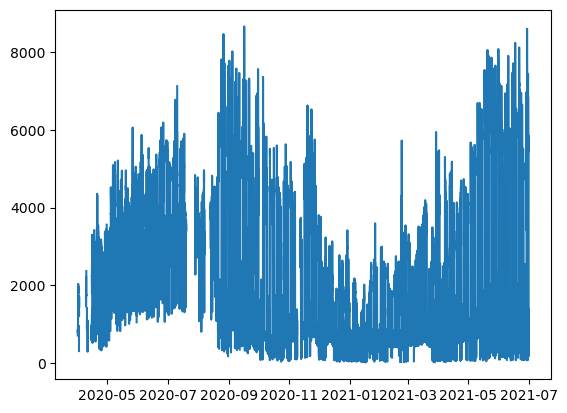

In [127]:
from matplotlib import pyplot as plt

plt.plot(a.Timestamp,a.CoolingLoad)
plt.show()

In [93]:
a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad']

Timestamp
2020-04-01    1394.049253
2020-04-02    1314.385188
2020-04-03            NaN
2020-04-04            NaN
2020-04-05            NaN
                 ...     
2021-06-26    1283.898346
2021-06-27    1258.519683
2021-06-28    3186.797691
2021-06-29    3419.994851
2021-06-30    3211.805784
Name: CoolingLoad, Length: 456, dtype: float64

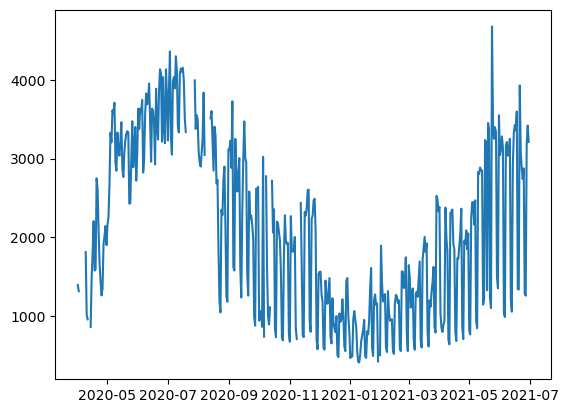

In [94]:
plt.plot(a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad'])
plt.show() #直接按照日期plot, 有明显随季节周期性 且有小周周期性

<ipython-input-125-93c4c4f844c5>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])


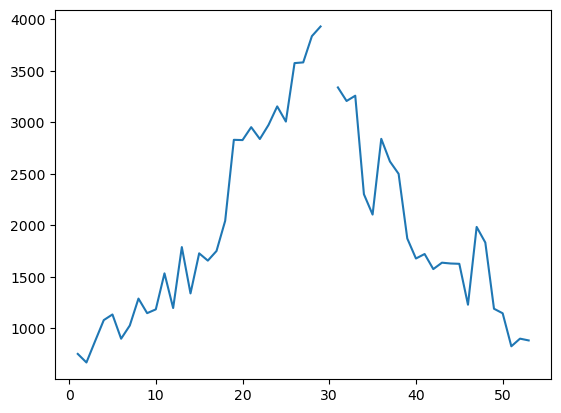

In [125]:
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
plt.show() #直接按照每周粒度plot, 有明显随季节周期性

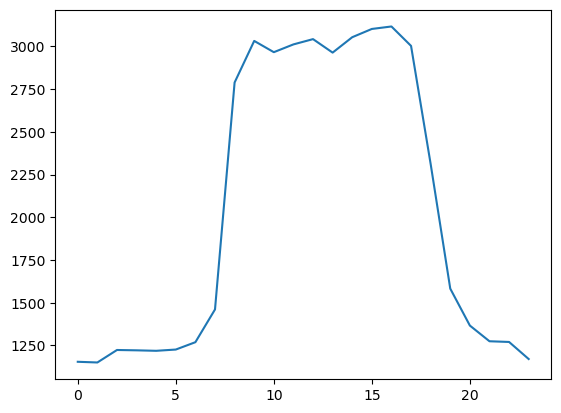

In [96]:
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad'])
plt.show() #一天中每小时变化, 早八晚七

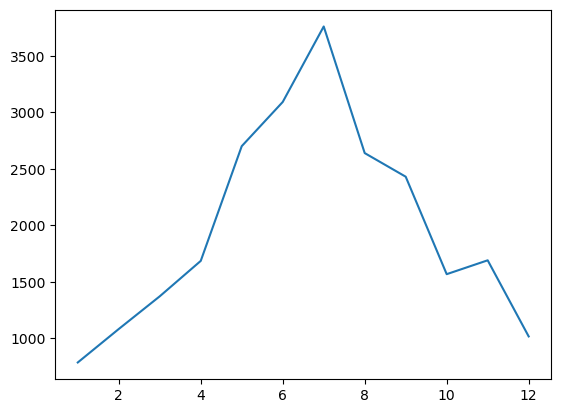

In [97]:
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad'])
plt.show() #一年中每个月的变化, 符合预期

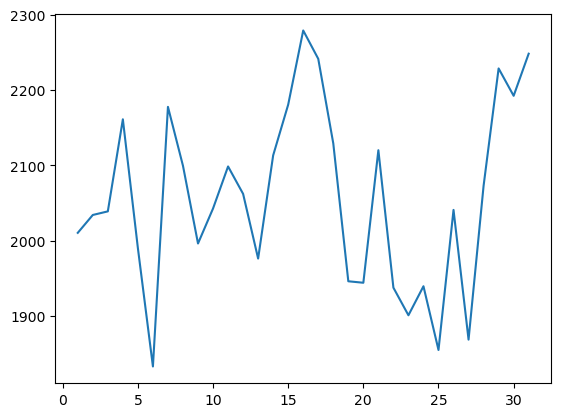

In [100]:
plt.plot(a.groupby(a.Timestamp.dt.day).mean()['CoolingLoad'])
plt.show() # 以一个月中每一天group, 看不出什么规律, 在第七天有一个drop 可能和周末有关???

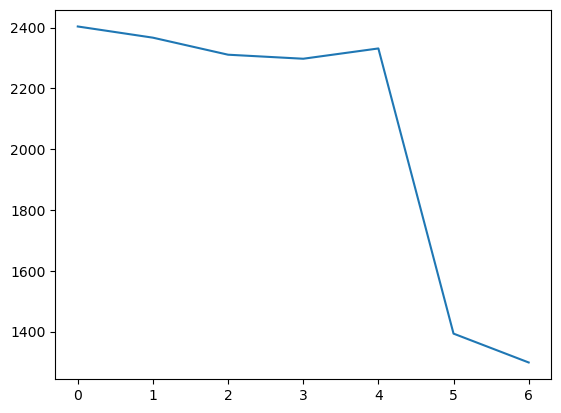

In [101]:
plt.plot(a.groupby(a.dayofweek).mean()['CoolingLoad'])
plt.show() #一周七天的统计, 周六日放假

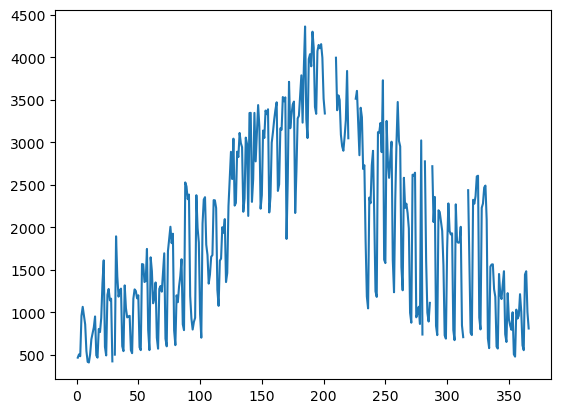

In [102]:
plt.plot(a.groupby(a.dayofyear).mean()['CoolingLoad'])
plt.show() 

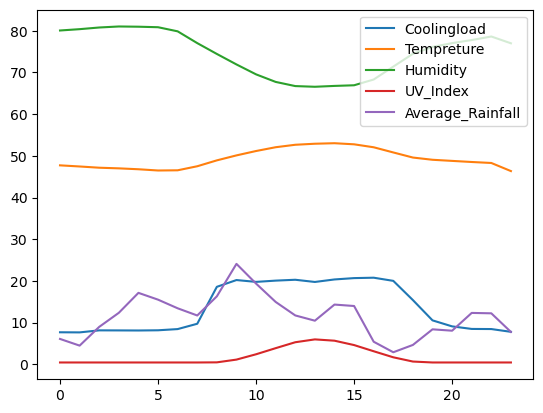

In [126]:
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad']/150,label='Coolingload')
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['Average_OAT']*2,label='Tempreture')
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['Humidity'],label='Humidity')
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['UV_Index'],label='UV_Index')
plt.plot(a.groupby(a.Timestamp.dt.hour).mean()['Average_Rainfall']*50,label='Average_Rainfall')
plt.legend()

plt.show() # 一天24小时粒度 CL与UV,Temp成正相关, 与湿度成负相关

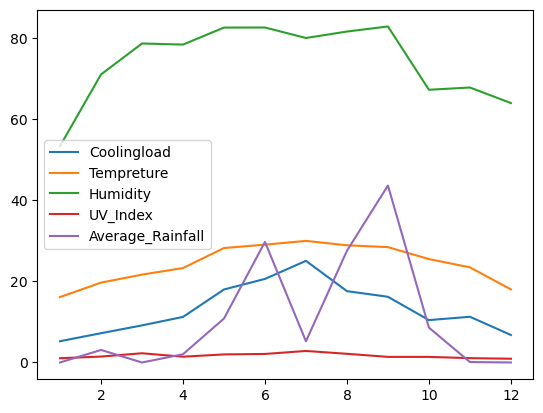

In [108]:
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad']/150,label='Coolingload')
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['Average_OAT'],label='Tempreture')
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['Humidity'],label='Humidity')
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['UV_Index'],label='UV_Index')
plt.plot(a.groupby(a.Timestamp.dt.month).mean()['Average_Rainfall']*50,label='Average_Rainfall')
plt.legend()

plt.show() #一年12个月粒度 与上述一致 

<ipython-input-130-e9617ccabd92>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad']/150,label='Coolingload')
<ipython-input-130-e9617ccabd92>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_OAT'],label='Tempreture')
<ipython-input-130-e9617ccabd92>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['Humidity'],label='Humidity')
<ipython-input-130-e9617ccabd92>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['UV_Index'],label='UV_I

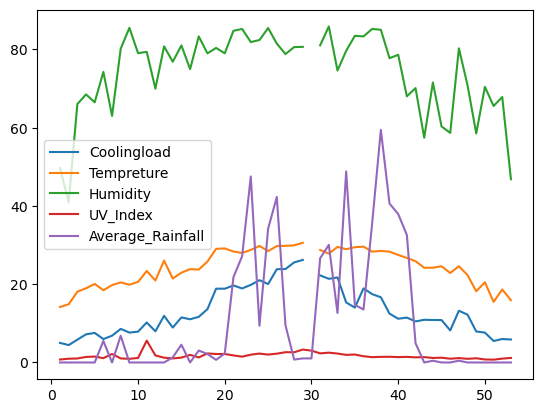

In [130]:
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad']/150,label='Coolingload')
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_OAT'],label='Tempreture')
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['Humidity'],label='Humidity')
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['UV_Index'],label='UV_Index')
plt.plot(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_Rainfall']*50,label='Average_Rainfall')
plt.legend()

plt.show() #一年12个月粒度 与上述一致 

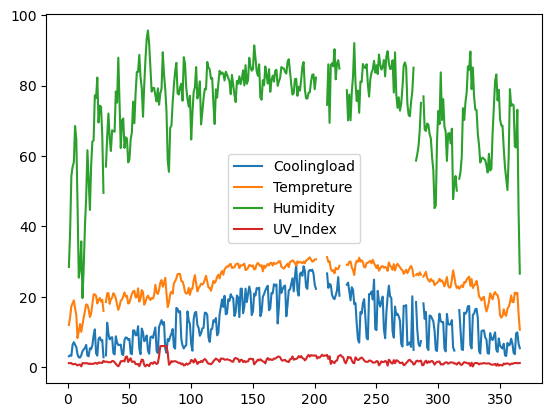

In [113]:
plt.plot(a.groupby(a.dayofyear).mean()['CoolingLoad']/150,label='Coolingload')
plt.plot(a.groupby(a.dayofyear).mean()['Average_OAT'],label='Tempreture')
plt.plot(a.groupby(a.dayofyear).mean()['Humidity'],label='Humidity')
plt.plot(a.groupby(a.dayofyear).mean()['UV_Index'],label='UV_Index')
#plt.plot(a.groupby(a.dayofyear).mean()['Average_Rainfall']*50,label='Average_Rainfall')
plt.legend()
plt.show()


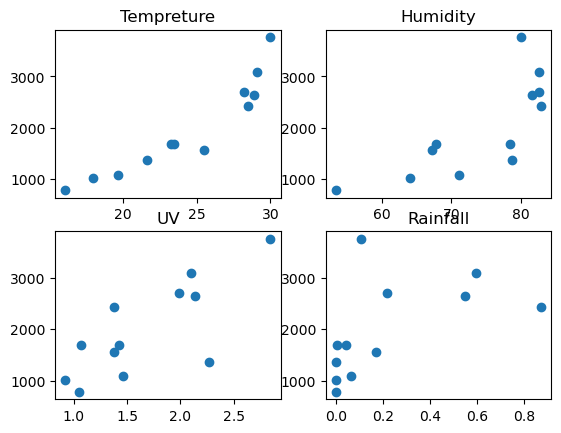

In [121]:
plt.subplot(221)
plt.scatter(a.groupby(a.Timestamp.dt.month).mean()['Average_OAT'],a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad'])
plt.title('Tempreture')
plt.subplot(222)
plt.scatter(a.groupby(a.Timestamp.dt.month).mean()['Humidity'],a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad'])
plt.title('Humidity')
plt.subplot(223)
plt.scatter(a.groupby(a.Timestamp.dt.month).mean()['UV_Index'],a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad'])
plt.title('UV')
plt.subplot(224)
plt.scatter(a.groupby(a.Timestamp.dt.month).mean()['Average_Rainfall'],a.groupby(a.Timestamp.dt.month).mean()['CoolingLoad'])
plt.title('Rainfall')

plt.show() # 月粒度 与temp,hum正相关????

<ipython-input-129-e91fb10ae0a0>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_OAT'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
<ipython-input-129-e91fb10ae0a0>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['Humidity'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
<ipython-input-129-e91fb10ae0a0>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['UV_Index'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
<ipython-input-129-e91fb10ae0a0>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Ple

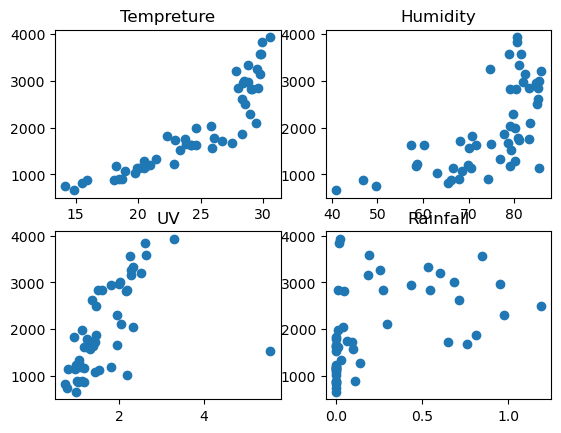

In [129]:
plt.subplot(221)
plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_OAT'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
plt.title('Tempreture')
plt.subplot(222)
plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['Humidity'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
plt.title('Humidity')
plt.subplot(223)
plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['UV_Index'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
plt.title('UV')
plt.subplot(224)
plt.scatter(a.groupby(a.Timestamp.dt.weekofyear).mean()['Average_Rainfall'],a.groupby(a.Timestamp.dt.weekofyear).mean()['CoolingLoad'])
plt.title('Rainfall')

plt.show() # 月粒度 与temp,hum正相关????

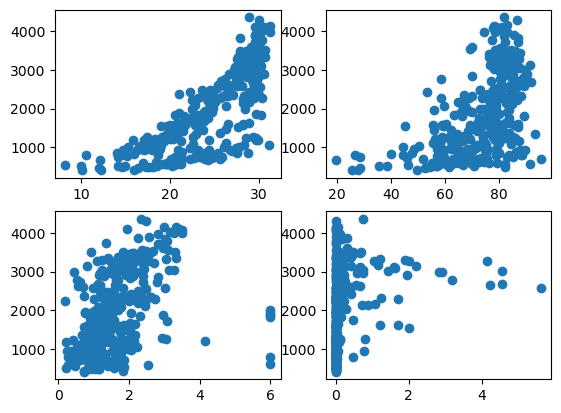

In [122]:
plt.subplot(221)
plt.scatter(a.groupby(a.dayofyear).mean()['Average_OAT'],a.groupby(a.dayofyear).mean()['CoolingLoad'])
plt.subplot(222)
plt.scatter(a.groupby(a.dayofyear).mean()['Humidity'],a.groupby(a.dayofyear).mean()['CoolingLoad'])
plt.subplot(223)
plt.scatter(a.groupby(a.dayofyear).mean()['UV_Index'],a.groupby(a.dayofyear).mean()['CoolingLoad'])
plt.subplot(224)
plt.scatter(a.groupby(a.dayofyear).mean()['Average_Rainfall'],a.groupby(a.dayofyear).mean()['CoolingLoad'])

plt.show() #以日为粒度

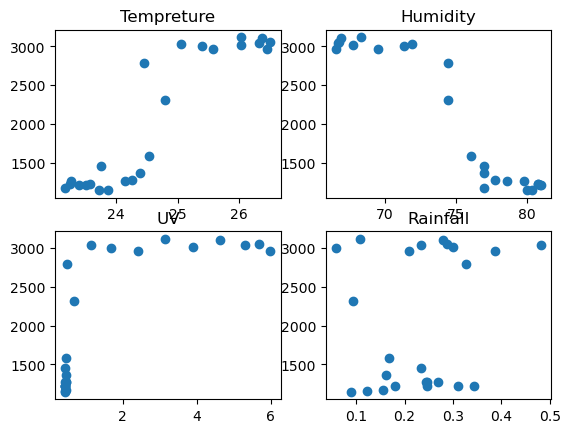

In [123]:
plt.subplot(221)
plt.scatter(a.groupby(a.Timestamp.dt.hour).mean()['Average_OAT'],a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad'])
plt.title('Tempreture')
plt.subplot(222)
plt.scatter(a.groupby(a.Timestamp.dt.hour).mean()['Humidity'],a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad'])
plt.title('Humidity')
plt.subplot(223)
plt.scatter(a.groupby(a.Timestamp.dt.hour).mean()['UV_Index'],a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad'])
plt.title('UV')
plt.subplot(224)
plt.scatter(a.groupby(a.Timestamp.dt.hour).mean()['Average_Rainfall'],a.groupby(a.Timestamp.dt.hour).mean()['CoolingLoad'])
plt.title('Rainfall')
plt.show() #以一天内为小时为粒度, 与temp和UV成明显的阶跃关系, 但是和hum成反阶跃, 推测因为temp和hum在短时有极强负相关性, 但在长时有正相关性(符合常识)

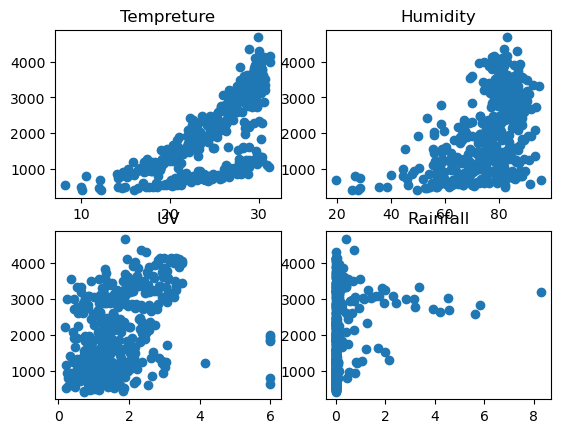

In [124]:
plt.subplot(221)
plt.scatter(a.groupby(a.Timestamp.dt.date).mean()['Average_OAT'],a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad'])
plt.title('Tempreture')
plt.subplot(222)
plt.scatter(a.groupby(a.Timestamp.dt.date).mean()['Humidity'],a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad'])
plt.title('Humidity')
plt.subplot(223)
plt.scatter(a.groupby(a.Timestamp.dt.date).mean()['UV_Index'],a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad'])
plt.title('UV')
plt.subplot(224)
plt.scatter(a.groupby(a.Timestamp.dt.date).mean()['Average_Rainfall'],a.groupby(a.Timestamp.dt.date).mean()['CoolingLoad'])
plt.title('Rainfall')
plt.show()